<a href="https://colab.research.google.com/github/Valentinapazg/IA/blob/main/red%20neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera I.A.**

**Enseñemos a Sumar**

**Autor:** Luis H. Vidal V. (lvidal@uach.cl)

**Actualizado:** 01 de noviembre de 2022

**Descripción:** Se presenta una introducción a redes neuronales, se desarrolla un ejercicio básico creado para mostrar como una computadora aprende mediante un proceso de entrenamiento, corresponde a la creación de una I.A., nuestro Hola Mundo!!!

El código no esta completo, dado que se creo como herramienta de comprensión, queda pendiente separar datos en enreaniento y testing.




#**1 Introducción a Redes Neuronales**

Una introducción a Redes Neuronales, clase de I.A. dictada el año 2020, curso de I.A. para negocios.

Prof. Luis Vidal Vidal 

https://www.youtube.com/watch?v=XmCd-ocga5E&ab_channel=LuisVidal 

**Contenidos:**
- La Neurona
- Funciond de Activacion
- ¿Cómo funcionan las redes neuronales?
- ¿Cómo aprenden las redes neuronales?
- Propagación hacia adelante
- Propagación hacia atras
- Gradiente descendiente

#**2 Creacion de Primera I.A.**

#2.1 Importar librerias

Usaremos las librerías pandas y numpy, se incluyen dos enlaces para mayor información


pandas: https://profile.es/blog/pandas-python/   

numpy:  https://aprendeconalf.es/docencia/python/manual/numpy/


In [ ]:
import pandas as pd
import numpy as np

#2.2 Carga de datos

In [1]:
# Se emple la función wget que permita bajar al espacio de trabajo los datos para análisis
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/luisvidalvidal/cursoIA/main/suma.csv

--2022-12-13 01:02:42--  https://raw.githubusercontent.com/luisvidalvidal/cursoIA/main/suma.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20530 (20K) [text/plain]
Saving to: ‘suma.csv’

suma.csv            100%[===================>]  20.05K  --.-KB/s    in 0s      

2022-12-13 01:02:42 (39.4 MB/s) - ‘suma.csv’ saved [20530/20530]



In [ ]:
# Utilizando pandas, se carga archivo en memoria como dataframe
df = pd.read_csv("suma.csv")

In [ ]:
#Se visualizan los primeros 10 registros
df.head(10)

,Y,X1,X2
0,10,5,5
1,16057,6528,9529
2,6940,2988,3952
3,1869,266,1603
4,1037,594,443
5,13837,8881,4956
6,9360,9059,301
7,11445,8003,3442
8,10067,3593,6474
9,14906,7550,7356


In [ ]:
# Muestra columnas del dataframe
print(df.columns)

Index(['Y', 'X1', 'X2'], dtype='object')


In [ ]:
# Creamos un dataset desde el archivo que se descargo.
dataset = df.values

Es importante notar la diferencia entre el **dataframe** y el **dataset**

In [ ]:
# Desplegamos dataframe
print(df)

In [ ]:
# Desplegamos dataset
print(dataset)

**Preparación de datos** 
- Y: variable objetivo (target) y 
- X: variables

In [ ]:
# Separamos datos
Y=dataset[:,0]
X=dataset[:,1:3]

In [ ]:
# Usar este código para dejar los tipos de datos como float, sugerido.
# por experiencia es necesario contar con datos de punto flotante 
# lo anterior es para el entrenamiento de la red neuronal
X=np.asarray(X).astype(np.float32)
Y=np.asarray(Y).astype(np.float32)

In [ ]:
# Imprimamos X e Y
print(X)
print(Y)

Ya se cuenta con los datos, es importante notar que en este caso no se realiza normalización de los mismos

Mayor información: https://empresas.blogthinkbig.com/precauciones-la-hora-de-normalizar/

#2.3 Creación del Cerebro de nuestra la I.A.

**Herramientas de apoyo:**
- Tensor Flow: https://www.tensorflow.org/
- Dibujo: http://alexlenail.me/NN-SVG/

**Carga de Librerias**

In [ ]:
# Uso de libreerias a un nivel excelsior
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

**Creación del cerebo o estructura de la red neuronal**

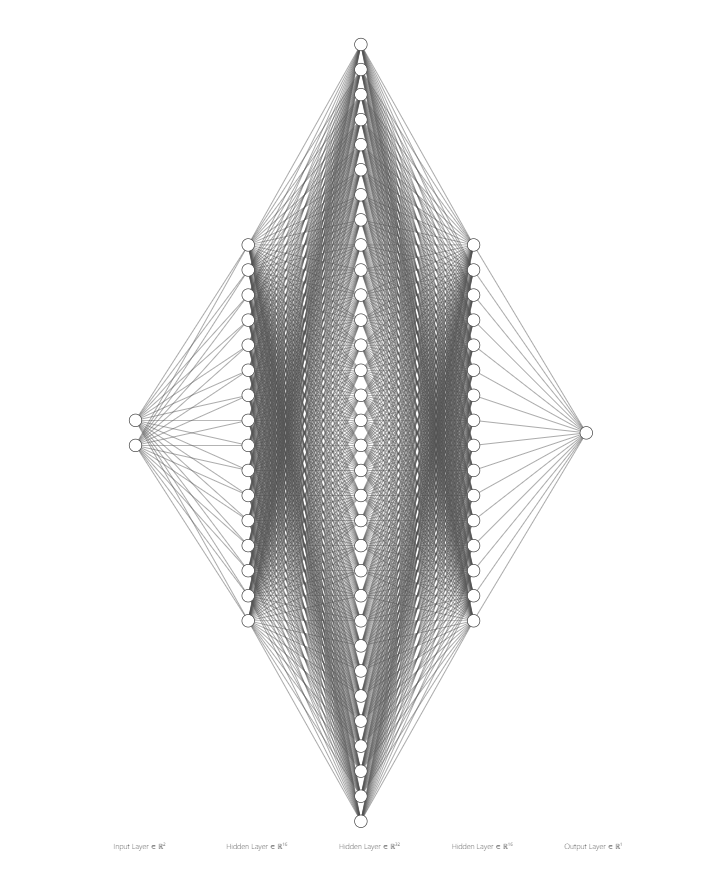

In [ ]:
#Creación del Cerebro o de la estructura de nuestra red neuronal
def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[2]),   #input_shape  se ingresa cantida de Xi
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Enlaces de apoyo: 

- Funciones de activación: https://bootcampai.medium.com/redes-neuronales-13349dd1a5bb
- mae: error medio absoluto https://support.numxl.com/hc/es/articles/215969423-MAE-Error-medio-absoluto 
- mse: error cuadrático medio https://support.numxl.com/hc/es/articles/115001223423-MSE-Error-Cuadr%C3%A1tico-Medio

In [ ]:
# Se crea el modelo Cerebro (modelo de redes neuronales)
# El modelo es la estructura creada sin entrenamiento
model = build_model()

#2.4 Entrenamiento de la Red Neuronal

In [ ]:
#Se emlea libreria adiconal, la que se descarga e instala
!pip install git+https://github.com/tensorflow/docs

In [ ]:
#Se importan librerias 
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [ ]:
#Se definen la cantidad de EPOCHS
EPOCHS = 1000

In [ ]:
#Código que realiza el entrenamiento de la red neuronal
#aquí se produce el aprendizaje  se emplea .fit
history = model.fit(
    X,Y,
    epochs=EPOCHS, verbose=0,
    callbacks=[tfdocs.modeling.EpochDots()])

#2.5 Ejecución de la I.A. 

In [ ]:
print("Aprendiendo a sumar")

#Ingreso de Valores X1 y X2
a=float(input("Ingrese primer valor: "))
b=float(input("Ingrese segundo valor: "))

#I.A. realiza la estimación
y=model.predict(np.array([[a,b]]))

#Cálculos para determinar error absoluto
suma=a+b
error_absoluto=abs(suma-y)

#Se imprimen resultados
print("El resultado es: %s apróximadamente" % y[0] [0])
print("El error absoluto es de: %s" % error_absoluto[0][0])

# **3 Actividad Propuesta**

Modifique el ejercicio para sumar número negativos, cree el set de datos de entrenamiento.